Binary Classification Example

Data: IMDB dataset / 50,000 polorized reviews / 25,000 for training and testing each with 50% negative and 50% positive / preproccessed to be a sequence of numbers where each number corresponds to a word in the dictionary 

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data.shape)
print(test_data.shape)

(25000,)
(25000,)


In [3]:
# encoding the integer sequences into a binary matrix
import numpy as np 

# this function sets each review to an array of 10000 0s where each index of the array corresponds to a word
# then cycles through and sets the indexes of the words that are in the review to 1
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. 
  return results 

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# vectorize the labels
print('Labels changed from type:', train_labels.dtype)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print('To type:', y_train.dtype)

Labels changed from type: int64
To type: float32


In [7]:
# two key architecture decisions about a stack of Dense layers like we'll use here
# 1. how many layers to use
# 2. how many hidden units to choose for each layer (the hidden units are the weights of the layer)
# our input data has 10,000 features that will each have the number of hidden units inputted into the layer 
# we will use : 
# 2 intermediate layers with 16 units each (relu)
# third layer that will output the scalar prediction regarding the sentiment of the current review (sigmoid activation)
# relu (rectified linear unit) is a function meant to zero out negative values 
# sigmoid squashes arbitrary values into the [0, 1] interval to be read as a probobility 
# flow: Input (vectorized text) => Sequential( dense layer 1 (units=16) => dense layer 2 (units=16) => dense layer 3 (units=1) ) => probobility
from keras import models 
from keras import layers 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
# adding loss function, optimizer, and setting the metric that is being monitered to measure success
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
# setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
# training
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 14s 956us/step - loss: 0.5376 - acc: 0.7765 - val_loss: 0.4008 - val_acc: 0.8666
Epoch 2/20
15000/15000 [==============================] - 10s 639us/step - loss: 0.3212 - acc: 0.8984 - val_loss: 0.3274 - val_acc: 0.8723
Epoch 3/20
15000/15000 [==============================] - 8s 503us/step - loss: 0.2349 - acc: 0.9241 - val_loss: 0.2857 - val_acc: 0.8863
Epoch 4/20
15000/15000 [==============================] - 6s 401us/step - loss: 0.1845 - acc: 0.9399 - val_loss: 0.2737 - val_acc: 0.8909
Epoch 5/20
15000/15000 [==============================] - 7s 436us/step - loss: 0.1532 - acc: 0.9508 - val_loss: 0.2990 - val_acc: 0.8809
Epoch 6/20
15000/15000 [==============================] - 7s 468us/step - loss: 0.1244 - acc: 0.9608 - val_loss: 0.2875 - val_acc: 0.8860
Epoch 7/20
15000/15000 [==============================] - 6s 382us/step - loss: 0.1090 - acc: 0.9651 - val_loss: 0.3035 

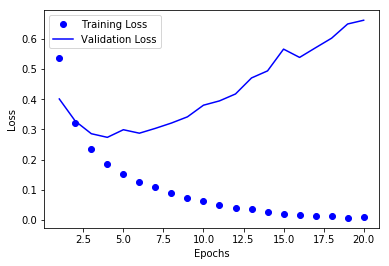

In [12]:
# visualizing the results 
import matplotlib.pyplot as plt 

history_dict = history.history 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

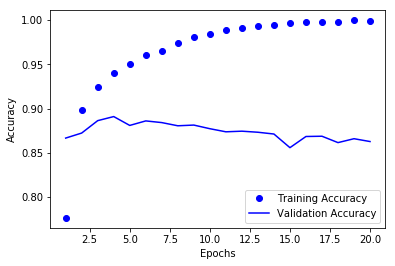

In [13]:
plt.clf() #cleans the figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
# we see from the graphs/results that overfitting really begins after epoch 4 so we'll cap it there to avoid major overfitting
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=512, epochs=4)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 9s 368us/step - loss: 0.4735 - acc: 0.8213
Epoch 2/4
25000/25000 [==============================] - 8s 311us/step - loss: 0.2672 - acc: 0.9091
Epoch 3/4
25000/25000 [==============================] - 4s 167us/step - loss: 0.2033 - acc: 0.9285
Epoch 4/4
25000/25000 [==============================] - 21s 843us/step
[0.3116244181728363, 0.87588]


Great, simple example of binary classification. 